# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

The Smartcab does not move at all during the simulation.  The driving agent receives positive rewards when making correct choice of action or a not harmful action.  The agent receives negative rewards when making wrong action.  Since the vehicle is not moving at all, whenever the light is red, the agent is receiving positive reward for not moving in red light.  When the light is green and when there is oncoming traffic the agent receives small reward for now making error and when there is no oncoming traffic, the agent receives negative reward for not moving when there is no danger.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

There are many flags you can set to change the simulation.  For example, for creating the environment, you can set verbose which will display more raw data in the terminal window for you.  The flag num_dummies sets the number of dummy agents in the simulation and when you change to lower number, you can see the number of dummy agents decreased in the simulation.  The flag grid_size sets the size of the field of simulation.  By changing the number of grid_size you can see the number of intersections of the street changing.  

When agent performs an action, function act() is called in the class Environment.  In the act() function, the action is assessed to determine if it is okay to perform or it is a violation.  Depending on chosen action, and if the action doesn't cause any violations, new heading is assigned so the primary agent can move.  If the action is a violation, penalty points are set according to equation.

The 'render_text()' function is non-GUI display of the simulation, meaing it displays the simulated data through text in terminal.  The 'render()' function uses pygame to GUI display of the simulation.

The 'next_waypoint()' function considers the East-West direction first before North-South.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


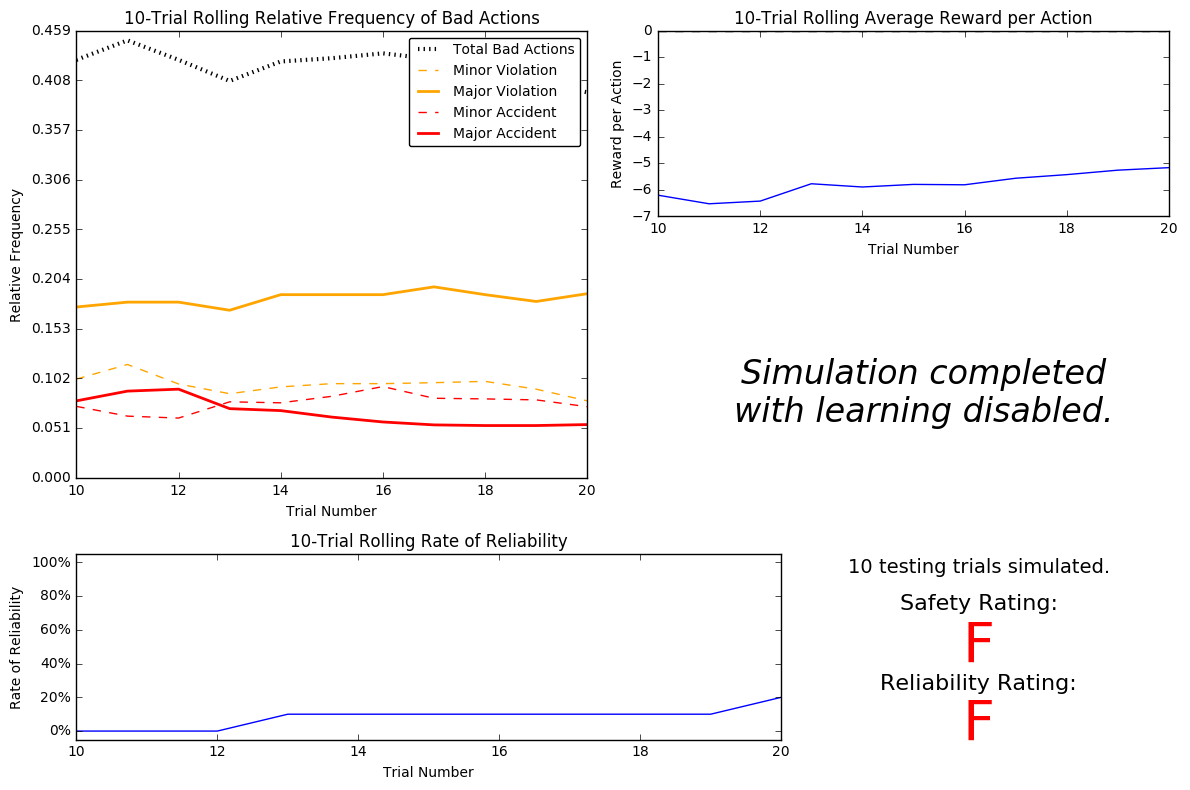

In [75]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

In [76]:
import pandas as pd
import numpy as np
import ast

df = pd.read_csv('logs/sim_no-learning.csv')
df['good_actions'] = df['actions'].apply(lambda x: ast.literal_eval(x)[0])
df['bad_actions'] = (df['initial_deadline'] - df['final_deadline']) -df['good_actions']
df['freq_bad_actions'] = df['bad_actions'] / (df['good_actions'] + df['bad_actions'])
df['freq_bad_actions_rolling'] = df['freq_bad_actions'].rolling(window = 10, center = False).mean()
df['total_accidents'] = df['actions'].apply(lambda x: ast.literal_eval(x)[3]) + df['actions'].apply(lambda x: ast.literal_eval(x)[4])
df['reliability_rate_rolling'] = (df['success']*100).rolling(window=10, center=False).mean()
df['reliability_rate'] = df['success']*100
df[['freq_bad_actions', 'freq_bad_actions_rolling', 'total_accidents', 'reliability_rate', 'reliability_rate_rolling']]

,freq_bad_actions,freq_bad_actions_rolling,total_accidents,reliability_rate,reliability_rate_rolling
0,0.300000,NaN,3,0,NaN
1,0.600000,NaN,5,0,NaN
2,0.550000,NaN,6,0,NaN
3,0.400000,NaN,3,0,NaN
4,0.400000,NaN,4,0,NaN
5,0.400000,NaN,2,0,NaN
6,0.360000,NaN,5,0,NaN
7,0.480000,NaN,2,0,NaN
8,0.400000,NaN,1,0,NaN
9,0.400000,0.429000,4,0,0.0


In [77]:
rolling_list = []
rolling_avg_list = []
for i, x in enumerate(df['freq_bad_actions']):
    rolling_list.append(x)
    rolling_avg = np.mean(rolling_list)
    rolling_avg_list.append(rolling_avg)

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

According to the graph that was provided using visual help function, the drivers made bad decisions between 38% to 45% frequency and between 5% to 10% of the actions caused accidents.  

Since the agent was moving randomly between 4 states of [None, forward, left, right], rate of reliability being very low 20% makes sense as only agents reaching destination woudl be just a coincidence of combination of 4 actions. 

The agent is receiving average between -5.0 and -7.0 in rewards per action.  Looking through the data from few sample steps from trials, the agent received most penalty when driving through red light with traffic and causing major accident which in real life would be the worst scenario.  Even if it is blowing red light, if there were no other dummyagents on the path and not causing accident, the penalty was reduced.  

The number of trials increasing didn't seem to effect the results as all the actions were taken randomly without any feedback loop.

The safety rating and reliability rating perfectly agrees with our conclusions on other graphs.  Since the primary agent is taking action totally randomly out of 4 states possible, this version of Smarcab is not safe and not reliable for its passengers.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**

For safety, input sensor data from the Smartcab is very crucial.  The data determines the color of the traffic light and 'left', 'right', 'oncoming' feature let's you know if there is vehicle in harms way of the primary agent.  Efficiency wise, it depends more on waypoint and deadline as the waypoint is the goal the primary agent has to achieve and deadline is the number of actions to achieve the destination.  All these features are very important in my opinion to achieve safe and reliable Smartcab.  If we were to filter out features to minimize the number of features we use, 'left' and 'right' could be omitted since we are assuming other cars are following traffic signal.  This leaves us features 'waypoint', inputs['light'], and inputs['oncoming'] as a must included states to make state space.  These states will determine if the agent is being safe or making right moves to reach the goal.
After initial review, I realized that inputs['left'] needs to be in the state space for the agent to safely recognize when to turn right when the light is red.  This features is included back into state.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

From the state space I have selected from Question 4, it would be (waypoint, inputs['light'], inputs['oncoming'], inputs['left']).  Looking at the planner.py Waypoint state has three states of 'right', 'left', and 'forward'.  In input, 'light' has two state of 'red' and 'green', each of 'oncoming', 'left' and 'right' has four states of [None, 'forward', 'left', 'right'].  These selected parameters each have 3,2 and 4 possibilities respectably to have a resulting state space number of 3 * 2 * 4 * 4 = 96.  Since we left out none crucial states from question 4 and went with only 96 possible states, I think it is possible to learn a policy within a reasonable number of training trials.  Changing the epsilon decaying formula and increasing number of trials and exploration would give the agent more chance to learn proper policy.
 

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

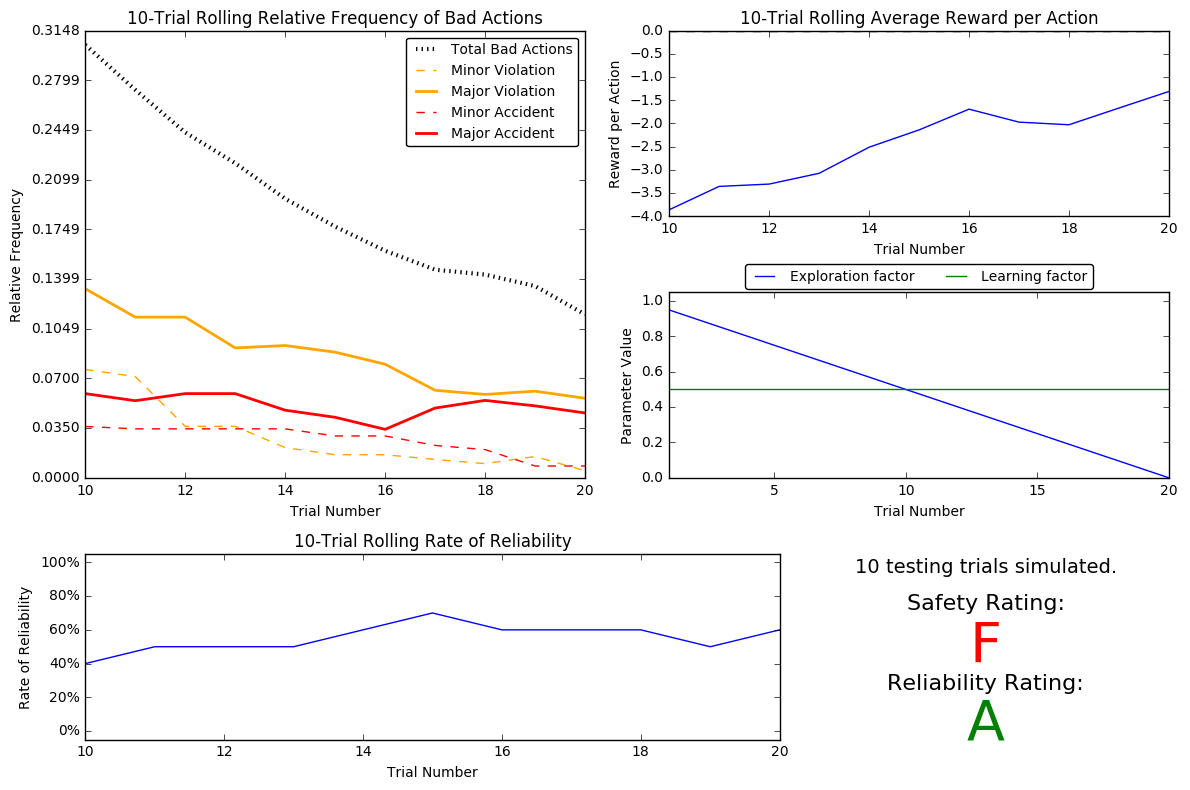

In [3]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

Compared to the basic driving agent with no-learning, this result showed significant improvement.  There were almost no similarities as the first agent used just random actions to get through the trials and testing and Q-Learning agent actually improved and learned as it went through more iterations.  
Since we were using decreasing epsilon value of flat 0.05 every training, it took exactly 20 training trials to finish learning.
Now this does not guarantee all the states have been through multiple iteration to a efficient Q table values but it is reasonable amount.  This was definitly the case when we see the result of frequency of bad actions decreasing over the training trials and rewards per action increasing over the training trials.  This also proves that our exploration factor epilon was doing what it was intended as it used more random actions in the earlier trials to explore.
The safety and reliability rating both increased dramatically compared to the basic driving agent as this agent actually implemented Q-Learning although it was not optimized at all which we will get to in the next section.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

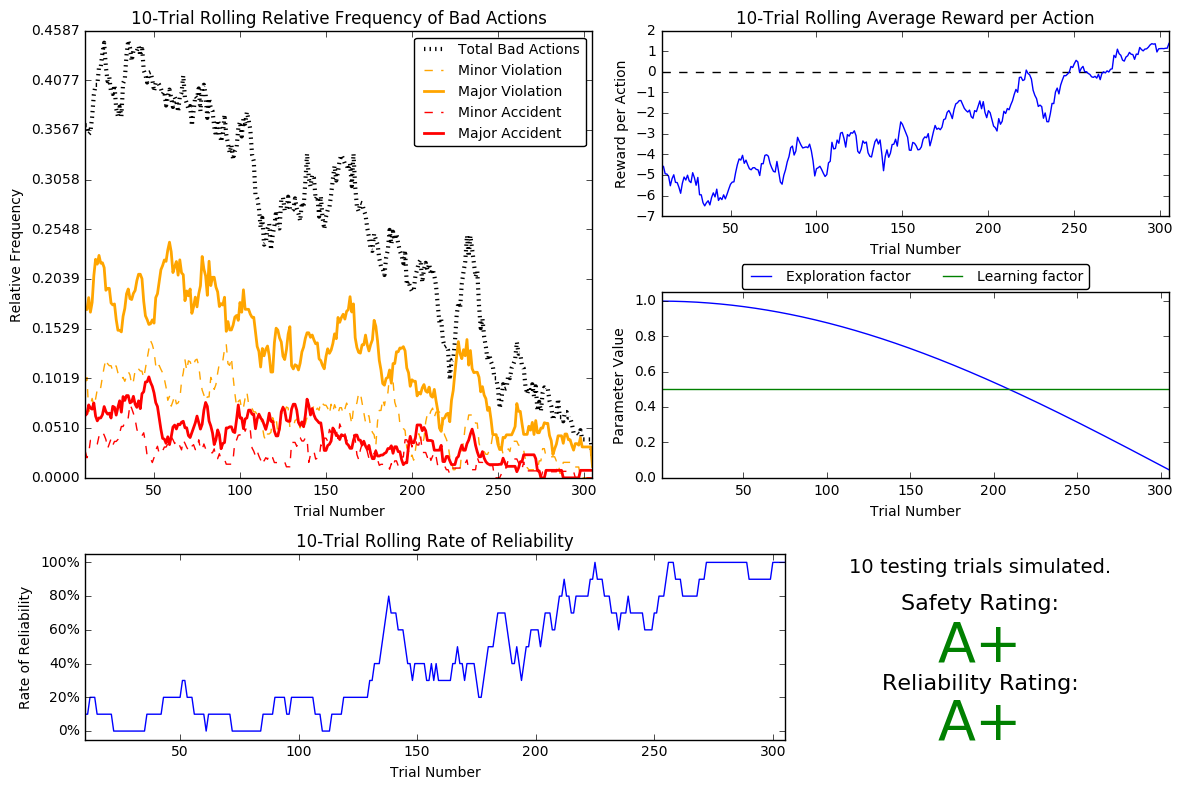

In [7]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

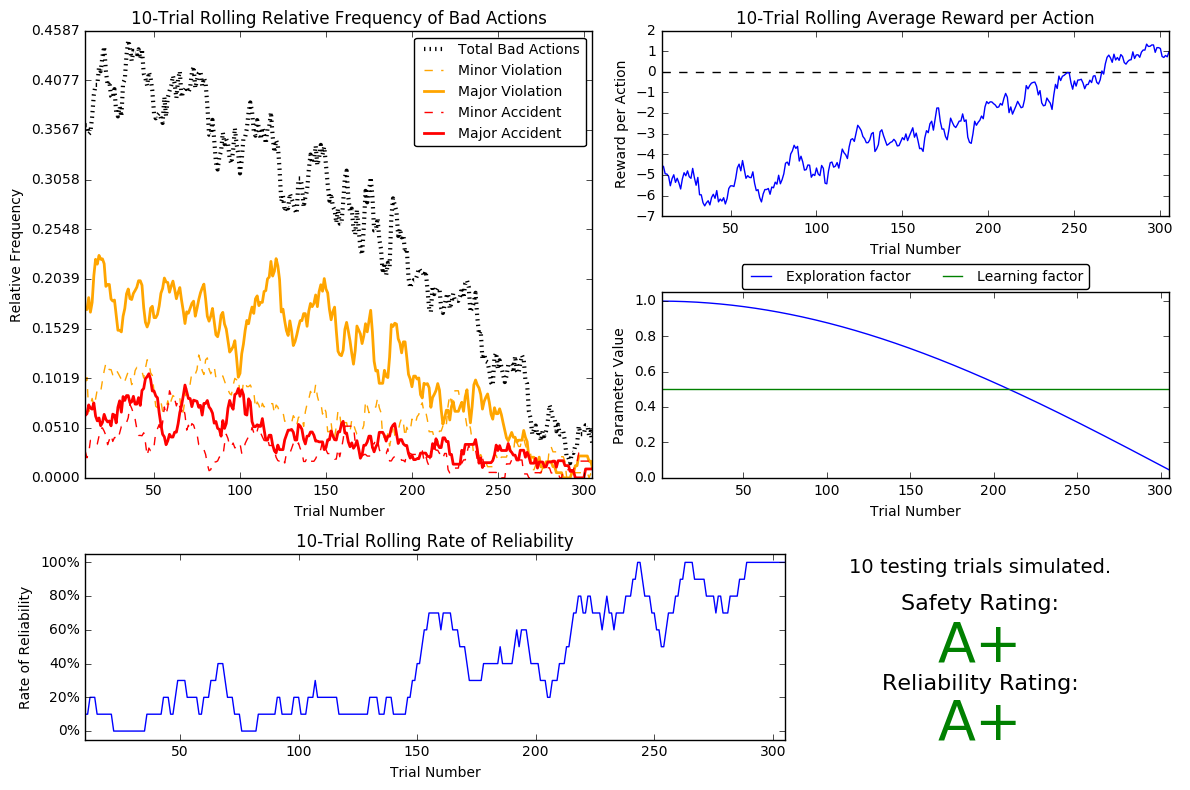

In [8]:
#This was test run for 5 paremeter built state with more trials.
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

I chose to use the cosine decaying function:
$$ \epsilon = \cos(at) $$
with a = 0.005 and t = number of trials.  This gave me a curve with heavy exploration with earlier trials and gradually falling down at faster rate as the trials went on.  I prefered this decaying function over linear decaying to concentrate on more exploring earlier trials.  The a value have been adjusted to make sure the Q-table has all the states in the dictionary with many trials to iterate over.

With this decaying algorithm, approsimately 300 trial runs were used to train the Q-Learning agent before testing.  Default value of 0.05 was used for the tolerance as it determined the minimum epsilon necessary to begin testing.  Using slightly higher epsilon value wouldn't have effected the Q agent too much as it would have been choosing same value over and over again later in trials.  Keeping it low ensures the agent gets enough trials before random actions stop taking place.  Default alpha rate of 0.5 was used after trying out multiple decaying algorithm.  The Q agent didn't seen to have significant increase in performance, if there was any, when the decaying function was used for alpha.

The improved Q-Learner made significant improvement over default Q-Learner from the previous section as it scored A+ for both safety and reliability rating during testing.  It also showed the agent improving over number of trials as the freqency of the bad actions decreased and reliability and reward per action increased.

The Q-Learner result showed that driving agent can successfully learn the appropriate policy if all the states have chance to go through enough iteration with all possibilities.  Over all I was satisfied with the ratings of the Smartcab but there is always room for improvement.  For real life situation, it would require for the frequency of bad actions to be theoritical Zero to be out in the streets.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 

('forward', 'red', None, 'left')
 -- forward : -25.70
 -- right : 1.10
 -- None : 1.90
 -- left : -10.20
 
 This state is a good example of well learned Q-values.  According to U.S. right-of-way traffic law, at 'red' signal, a vehicle should not move forward or left, but situationally can turn right.  This shows well on the Q-table as the highest Q-value is for 'None' and the second highest Q-Value is for 'right'.  With the added information from 'left' feature, the agent knows it is safe to turn right as it has a value of 1.10 behind 1.90 of None.
 
('left', 'green', None, None)
 -- forward : 0.26
 -- right : 0.86
 -- None : -5.48
 -- left : 1.33
 
 This state is also displays well learned Q-values.  Since the vehicle's waypoint is set to 'left', it has the highest Q-value which will make the vehicle turn in optimal route with 'green' traffic signal with no oncoming agent.  Also following the law, since the signal is 'green', there are also suboptimal ways for 'forward' and 'right'.  Only 'None' is heavily penalized as not taking any action during 'green' light would be wrong.
 
('right', 'red', None, 'forward')
 -- forward : -39.61
 -- right : -19.82
 -- None : 1.17
 -- left : -40.11
 
This state is an example of where the fourth featuer of inputs['left'] really shines unlike the previous examples of states.  With the waypoint of 'right' and light 'red', the vehicle wants to know if it can move.  Since it is 'red', heavy penalty is given for Q-value for 'forward' and 'left' and also agent is penalized in this state because there is 'left' agent coming 'forward' which would cause an accident.

('right', 'red', None, None)
 -- forward : -10.34
 -- right : 1.01
 -- None : 2.08
 -- left : -9.76
 
This state is similar to the previous example but with no 'left' agent coming.  This changes the 'right' Q-value so it is at least suboptimal to take a 'right' turn which would not cause any accidents.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

When I was studying Q-Learning algorithm, the most popular approach was using 'Frozen Lake' environment to teach the Q-Learning.  This environment used fixed goal posistion with fixed hazardous holes and random wind conditions to train the agent.  In our Smartcab, we only had information about one intersection at a time to the agent which does not know where to go for the next action for the next intersection until it is a next time step.  This makes the delayed reward irrelevant.  In the environment, not like the 'Frozen Lake', the goal position and signals and dummy agents were constantly changing.  Learning delayed reward would have been impossible for this situation.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.